<a href="https://colab.research.google.com/github/exalteded/DSPS_ejones/blob/master/HW4/GalrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy


Populating the interactive namespace from numpy and matplotlib



**SOLVE FOR V^2 Proportional to 1/r**

F= Ma
a = dv/dt or v^2/r (rotational) from physics classroom
F = GmM/r^2

Replace v^2/r for a 

M(v^2/r) = GmM/r^2 (rs cancel Ms cancel)

v^2 = Gm/r where Gm is a constant

so v^2 is proportional to 1/r

In [0]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv", comment = "#", names = ["R", "V", "dev", "err"])
#note to self don't put dots in names function
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv", comment = "#", names = ["R", "V", "dev", "err"])

In [87]:
m31.head() #test names

,R,V,dev,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [88]:
m31.describe()

,R,V,dev,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [144]:
mw.head() # test names on milkyway now

,R,V,dev,err
0,R(kpc),V(km/s),St.dev.,St.error
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870


In [0]:
a_distance = 778
#andromeda distance = 778 kpc +/- 33
a_apparents = 3.167 
# andromeda apparent size in degrees

In [23]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = a_apparents * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)))

Angular Size of the visible component of Andromeda: 0.06 rad


In [0]:
distanceM31_std = 33 *u.kpc
m31_dist_kpc = a_distance* u.kpc

In [29]:
print("Distnance of the visible component of Andromeda...: ", m31_dist_kpc)
print("uncertainty of the visible component of andromeda...",distanceM31_std)

Size of the visible component of Andromeda...:  778.0 kpc
uncertainty of the visible component of andromeda... 33.0 kpc


In [35]:
size_visible = m31_dist_kpc*m31angS.to(u.rad)
print("Size of the visible component of Andromeda...: ", size_visible)
new_err = m31_dist_kpc*m31angS.to(u.rad)*np.sqrt((distanceM31_std/m31_dist_kpc)**2)
print("Uncertainty of size of the visible component of andromeda...:", new_err)

Size of the visible component of Andromeda...:  43.0036212254938 kpc rad
Uncertainty of size of the visible component of andromeda...: 1.8240610545517937 kpc rad


In [77]:
def getradii(gal,gsize,n):
   # get minimum radius out the inequality    
    minimum = gal[gal.R > n * gsize].iloc[0]
    return minimum
#test run 
getradii(m31,size_visible,1)

R            49.222
V           237.069
St.dev.     109.381
St.error     23.924
Name: 34, dtype: float64

In [75]:
getradii(m31,size_visible,2)

R           102.068
V           213.002
St.dev.     132.456
St.error     29.321
Name: 38, dtype: float64

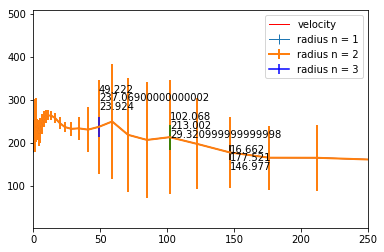

In [149]:
def plotGal(gal, rds):
  #1
  pl.plot(gal.R,gal.V, color = "red", linewidth = 1)
  #2
  pl.errorbar(gal.R,gal.V,gal.err, linewidth = 1)
  #3
  pl.errorbar(gal.R,gal.V,gal.dev, linewidth = 2)
  
  #1
 
  point1 = getradii(gal,rds,1)
  point2 = getradii(gal,rds,2)
  point3 = getradii(gal,rds,3)
  pl.errorbar(point1.R,point1.V,point1.err, color = "blue")
  pl.errorbar(point2.R,point2.V,point2.err, color = "green")
  pl.errorbar(point3.R,point3.V,point3.err, color = "black")
  #2
  pl.legend(('velocity',"radius n = 1", "radius n = 2", "radius n = 3"))
  #3
  pl.text(point1.R,point1.V+80, point1.R)
  pl.text(point1.R,point1.V+60, point1.V)
  pl.text(point1.R,point1.V+40,point1.err)
  pl.text(point2.R,point2.V+40, point2.R)
  pl.text(point2.R,point2.V+20, point2.V)
  pl.text(point2.R,point2.V,point2.err)
  pl.text(point3.R,point3.V-40, point3.R)
  pl.text(point3.R,point3.V-20, point3.V)
  pl.text(point3.R,point3.V,point3.err)
  #4
  pl.xlim(0,250)
plotGal(m31, size_visible)

In [0]:
#let's do the milkyway now in case I run out of time for the last function
# size of milkyway (46-41 m) so 43.5 +/- 2.5 kpc

size_mw = 43.5 *u.rad
uncertainty_mw = 2.5*u.kpc

TypeError: ignored

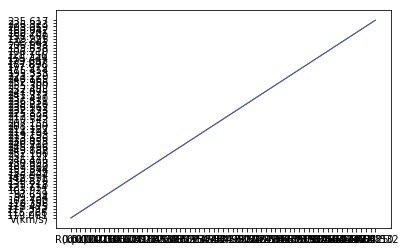

In [180]:
plotGal(mw,size_mw)
# well I don't think I can deal with that let's write the last function

Write a function that for a given dataset and a given luminous radius and a given N

1) uses the function above to find the radius at least as large as needed and the velocity at that radius,

2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$

3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,

4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$

Your function should print

 - the expected ratio based on the radii, 
 - the calculated ratio using ```dv```, and its uncertainty, - 
 - the 2-$\sigma$ upper and lower limits of the calculated ratio
 - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
5) and the same using err instead of dv

In [0]:
def ratiocalc(gal, rds, n,uncertainty):

  #1 find the radius
  radius = getradii(gal,rds,n).V
  #2 if radius goes up by a factor of 2 v should go down by a factor of 4 cause v is squared
  #3
  ratio = getradii(gal,rds,1).V/radius
  #add uncertainties together
  if (ratio > (1/4)*n + uncertainty): 
    print(" the calculated ration of", ratio, "is outside the expcted drop in velocity according to newton's law" )
  else: 
    print("the calculatedratio of", ratio, "is inside the expected drop in velocity according to newton's law")

In [176]:
ratiocalc(m31,size_visible,2,33)
#for m31

the calculatedratio of 1.1129895493939024 is inside the expected drop in velocity according to newton's law


In [181]:
ratiocalc(mw,size_mw,2,2.5)
# for mw

ValueError: ignored

In [0]:
#well we almost got through those last two errors kinda sucked but then again aside the functions could have been better.